In [52]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/luke/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sin', 'dtype']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [53]:
dtype = torch.FloatTensor

In [54]:
np.random.seed(1)

In [55]:
input_size, hidden_size, output_size = 7, 6, 1
time_steps = 10
lr = 0.1
series = np.linspace(2, 5, time_steps)
sin = np.sin(series)
sin.resize((time_steps, 1))
x = Variable(torch.Tensor(sin[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(sin[1:]).type(dtype), requires_grad=False)

In [56]:
lim = np.sqrt(6) / (np.sqrt(input_size + hidden_size))
w1 = np.random.uniform(-lim, lim, [input_size, hidden_size])
w1 = Variable(torch.from_numpy(w1).type(dtype), requires_grad=True)
lim = np.sqrt(6) / (np.sqrt(output_size + hidden_size))
w2 = np.random.uniform(-lim, lim, [hidden_size, output_size])
w2 = Variable(torch.from_numpy(w2).type(dtype), requires_grad=True)
hidden_prev = torch.zeros((1, hidden_size)).type(dtype)

In [57]:
def forward(x, w1, w2):
  h = torch.tanh(Variable(x).mm(w1))
  return   (h.mm(w2), h)

In [61]:
for iter in range(1000):

  i = iter % x.size(0)
  variable_y = y[i:(i+1)]
  current_x = x[i:(i+1)].data
  xh = torch.cat([current_x, hidden_prev], 1)    
  (y_pred, h) = forward(xh, w1, w2)
  loss = (y_pred - variable_y).pow(2).sum() /2
  if iter % 200 == 0:       
    print("Iteration: {} loss {}".format(iter, loss.data[0]))
  loss.backward()
  w1.data -= lr * w1.grad.data
  w2.data -= lr * w2.grad.data
  w1.grad.data.zero_()
  w2.grad.data.zero_()
  hidden_prev = h.data


Iteration: 0 loss 5.191025775275193e-05
Iteration: 200 loss 1.6264240912278183e-05
Iteration: 400 loss 0.0012509097578004003
Iteration: 600 loss 0.0016482655191794038
Iteration: 800 loss 0.0004046575049869716


In [62]:
predictions = []
for index, inp in enumerate(x):
  xh = torch.cat([inp.view(1, 1).data, hidden_prev], 1)  
  (pred, hidden_prev) = forward(xh, w1, w2)
  hidden_prev = hidden_prev.data
  predictions.append(pred.data.numpy().ravel()[0])

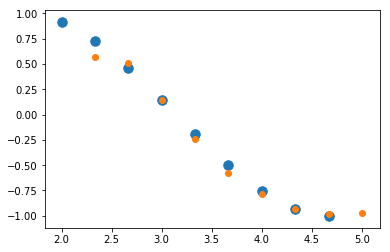

In [63]:
pl.scatter(series[:-1] , x.data.numpy(), s=90)
pl.scatter(series[1:], predictions)
pl.show()